In [33]:
from imgaug import augmenters as iaa
import numpy as np
from typing import Tuple

from typeguard import typechecked


class SegmentationAugmentor:
    def transform_image(self, image: np.ndarray, masks: np.ndarray) -> \
            Tuple[np.ndarray, np.ndarray]:
        """
        Transforms the input image into its augmented version.
        :param image: image of shape (dim1, dim2, channels)
        :param masks: masks with shape (dim1, dim2, num_masks)
        :return: tuple (transformed_image, transformed_masks)
        """
        raise NotImplementedError


class ImgAugAugmentor(SegmentationAugmentor):
    """Name comes from the library used: 'imgaug'. """

    _ROTATION_RANGE = -15, 15  # in degrees
    _TRANSLATE_PERCENT = {
        "x": (-0.025, 0.025),
        "y": (-0.025, 0.025),
    }

    @typechecked
    def __init__(self, random_seed: int = None):
        self._augmentor = iaa.Sequential([
            iaa.ElasticTransformation(alpha=8, sigma=2),
        ], random_order=True).to_deterministic()
        if random_seed:
            self._augmentor.reseed(random_seed, deterministic_too=True)

    @typechecked
    def transform_image(self, image: np.ndarray, masks: np.ndarray)-> \
            Tuple[np.ndarray, np.ndarray]:
        assert len(image.shape) == len(masks.shape) == 3, \
            f"Input shapes should have dim 3, but have dims " \
            f"{len(image.shape)} and {len(masks.shape)}."
        self._augmentor.reseed(deterministic_too=True)
        images_augmented = self._augmentor.augment_image(image)
        masks_augmented = self._augmentor.augment_image(masks).round()
        assert image.shape == images_augmented.shape
        assert masks.shape == masks_augmented.shape
        return images_augmented, masks_augmented


In [8]:
from nachbarstrom import LocalImgDataProvider
import matplotlib.pyplot as plt

In [9]:
basedir = "imgs/"
provider = LocalImgDataProvider(basedir=basedir, augmentor=None)

In [10]:
num_imgs = 5
X, y = provider(num_imgs)
print(X.shape)
print(y.shape)
print(X.min(), X.max())

(5, 640, 640, 3)
(5, 640, 640, 2)
0.0 1.0


In [11]:
def visualize(X_aug, y_aug):
    fig, ax = plt.subplots(3, num_imgs, figsize=(15, 8))
    for idx, imgs in enumerate(zip(X_aug, y_aug)):
        original, masks = imgs
        ax[0, idx].imshow(original)
        ax[1, idx].imshow(masks[...,0].round())
        ax[2, idx].imshow(masks[...,1].round())
    plt.tight_layout()
    plt.show()

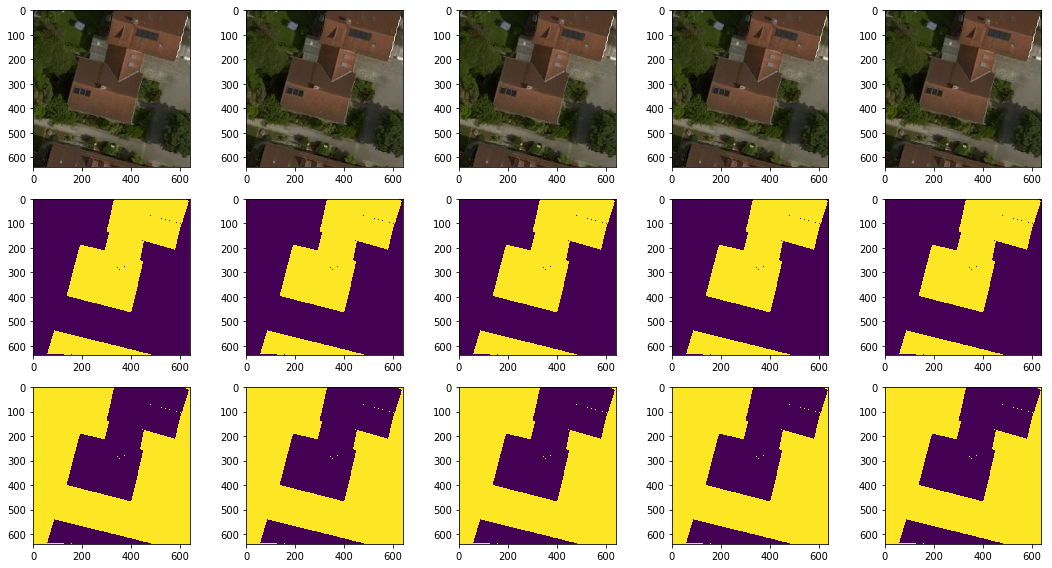

In [12]:
visualize(X, y)

In [34]:
augmentor = ImgAugAugmentor()

In [35]:
X2, y2 = zip(*(augmentor.transform_image(img, mask) for img, mask in zip(X, y)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


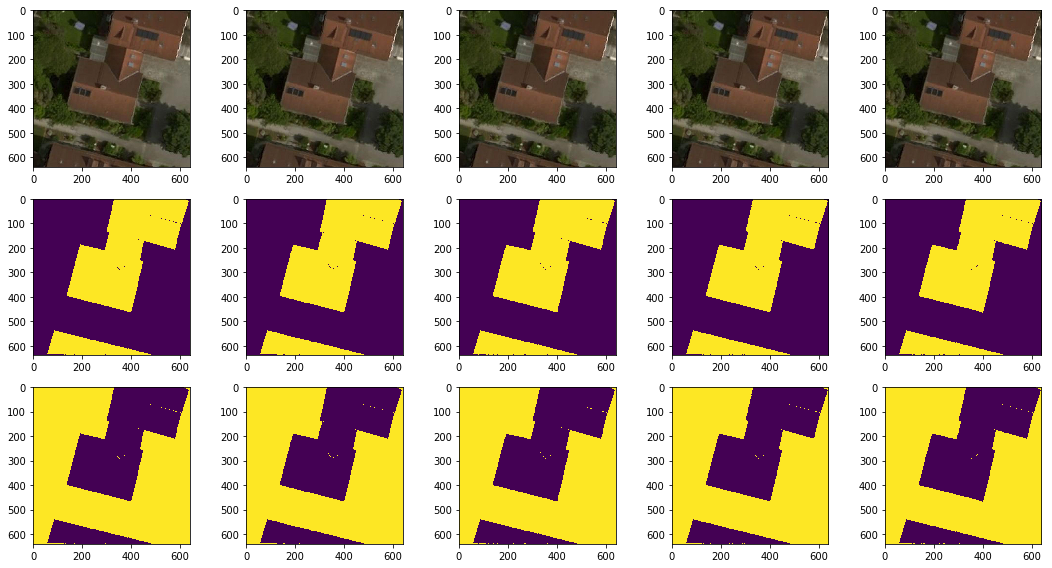

In [36]:
visualize(X2, y2)

In [39]:
np.array_equal(X2[0], X2[1])

False